# **1. Perkenalan Dataset**


 **Sumber Dataset**   
   Sumber Dataset yang digunakan : Kaggle  
   Judul Dataset: Data Science Salaries 2023  
   Link Dataset : https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

# **2. Import Library**

Library yang digunakan untuk analisis data dan pembangunan model machine learning.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

In [62]:
salary = "https://raw.githubusercontent.com/HildaOktaviani/Salary-Clustering-Clasiffication/4e9339725c9d8fe95b9944d00d8ea947c7e2a780/ds_salaries.csv"
salary_df_ori = pd.read_csv(salary)
salary_df = salary_df_ori.copy()
salary_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


# **4. Exploratory Data Analysis (EDA)**


Meninjau Struktur Data

In [63]:
salary_df.shape

(3755, 11)

In [64]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [65]:
salary_df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [66]:
salary_df.nunique()

,0
work_year,4
experience_level,4
employment_type,4
job_title,93
salary,815
salary_currency,20
salary_in_usd,1035
employee_residence,78
remote_ratio,3
company_location,72


In [67]:
numerical_cols = salary_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = salary_df.select_dtypes(include=['object']).columns.tolist()

print("Kolom Numerikal:", numerical_cols)
print("Kolom Kategorikal:", categorical_cols)

Kolom Numerikal: ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']
Kolom Kategorikal: ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']


Missing Value dan Duplikasi Data

In [68]:
print("Missing Values:\n", salary_df.isnull().sum())

Missing Values:
 work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [69]:
print("\nJumlah Duplikasi:", salary_df.duplicated().sum())


Jumlah Duplikasi: 1171


Analisis Distribusi dan Kolerasi

In [70]:
categorical_cols = salary_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(salary_df[col].unique(), "\n")

Unique values in 'experience_level':
['SE' 'MI' 'EN' 'EX'] 

Unique values in 'employment_type':
['FT' 'CT' 'FL' 'PT'] 

Unique values in 'job_title':
['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Mach

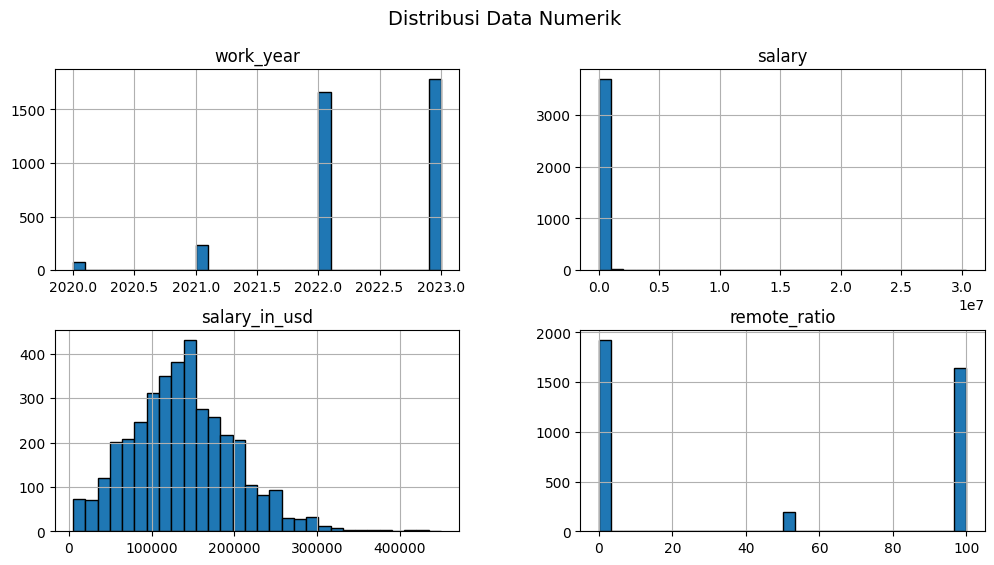

In [71]:
# Plot histogram untuk melihat distribusi data numerik
salary_df.hist(figsize=(12, 6), bins=30, edgecolor='black')
plt.suptitle("Distribusi Data Numerik", fontsize=14)
plt.show()

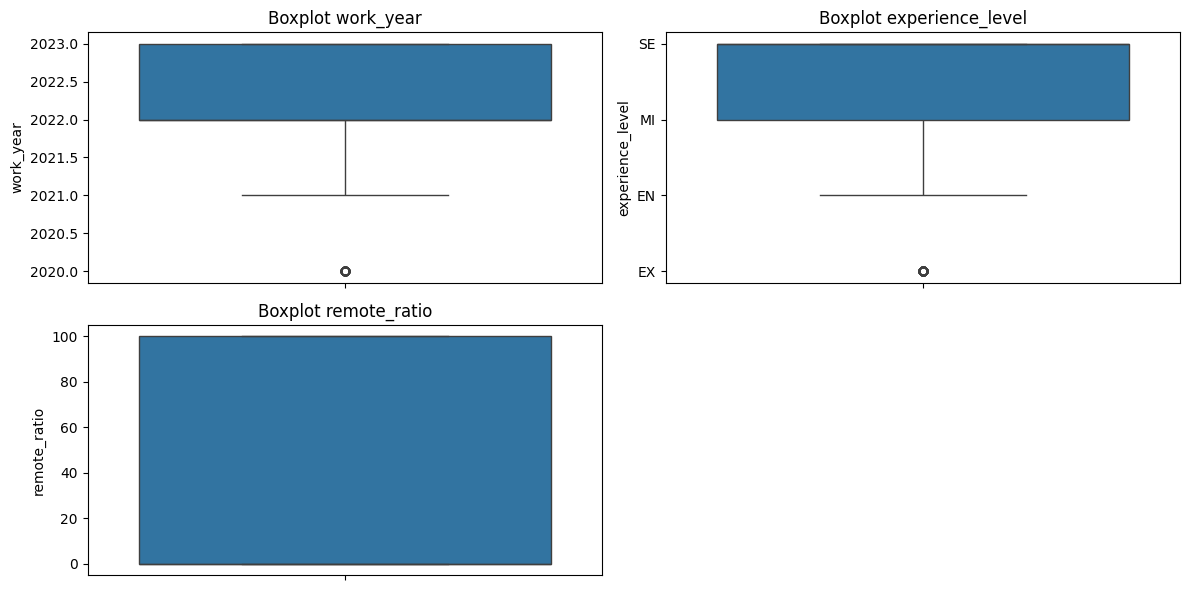

In [72]:
# Tinjau outliers pada kolom numerik menggunakan boxplot
numerical_columns = salary_df[['work_year', 'experience_level', 'remote_ratio']]
plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=salary_df[column])
    plt.title(f'Boxplot {column}')

plt.tight_layout()
plt.show()

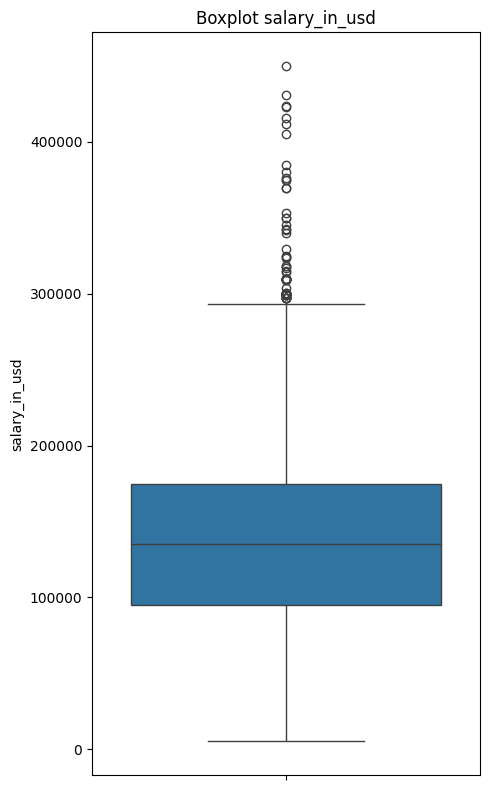

In [73]:
plt.figure(figsize=(5, 8))
sns.boxplot(y=salary_df['salary_in_usd'])
plt.title(f'Boxplot salary_in_usd')

plt.tight_layout()
plt.show()

Visualisasi Data

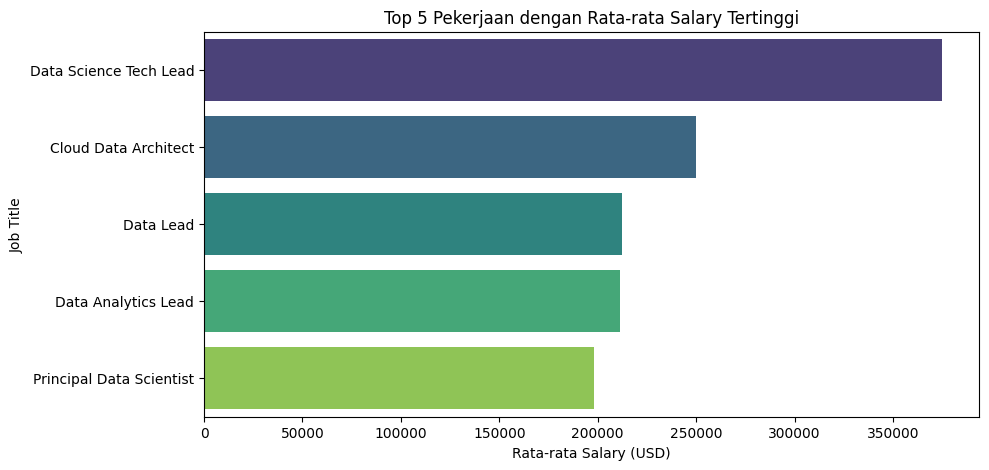

In [74]:
# Diagram batang untuk variable kategotikal
top_jobs = salary_df.groupby('job_title')['salary_in_usd'].mean().nlargest(5)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_jobs.values,
    y=top_jobs.index,
    hue=top_jobs.index,
    dodge=False,
    palette="viridis",
    legend=False  #
)

plt.xlabel("Rata-rata Salary (USD)")
plt.ylabel("Job Title")
plt.title("Top 5 Pekerjaan dengan Rata-rata Salary Tertinggi")

plt.show()

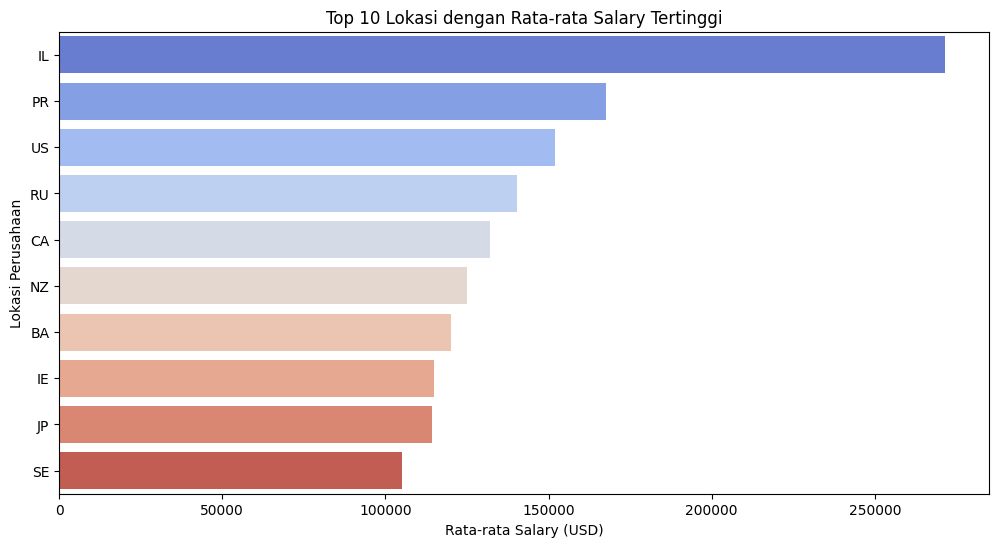

In [75]:
# Diagram batang untuk variable kategorikal
avg_salary_by_location = salary_df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)
top_locations = avg_salary_by_location.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_locations.values,
    y=top_locations.index,
    hue=top_locations.index,
    dodge=False,
    palette="coolwarm",
    legend=False
    )

plt.xlabel("Rata-rata Salary (USD)")
plt.ylabel("Lokasi Perusahaan")
plt.title("Top 10 Lokasi dengan Rata-rata Salary Tertinggi")
plt.show()

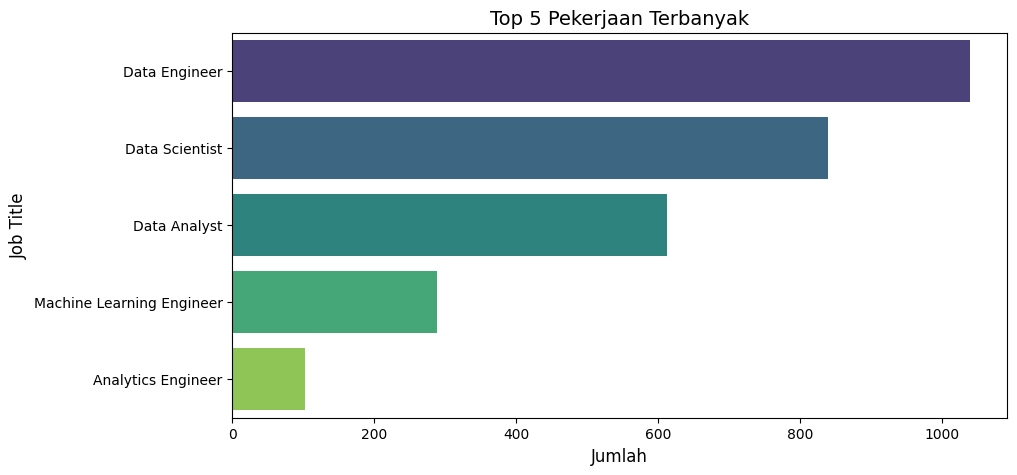

In [76]:
# Diagram batang untuk variable kategorikal
top_5_jobs = salary_df['job_title'].value_counts().nlargest(5)
plt.figure(figsize=(10, 5))

sns.barplot(
    x=top_5_jobs.values,
    y=top_5_jobs.index,
    palette="viridis",
    hue=top_5_jobs.index,
    dodge=False,
    legend=False
    )
plt.title("Top 5 Pekerjaan Terbanyak", fontsize=14)
plt.xlabel("Jumlah", fontsize=12)
plt.ylabel("Job Title", fontsize=12)

plt.show()

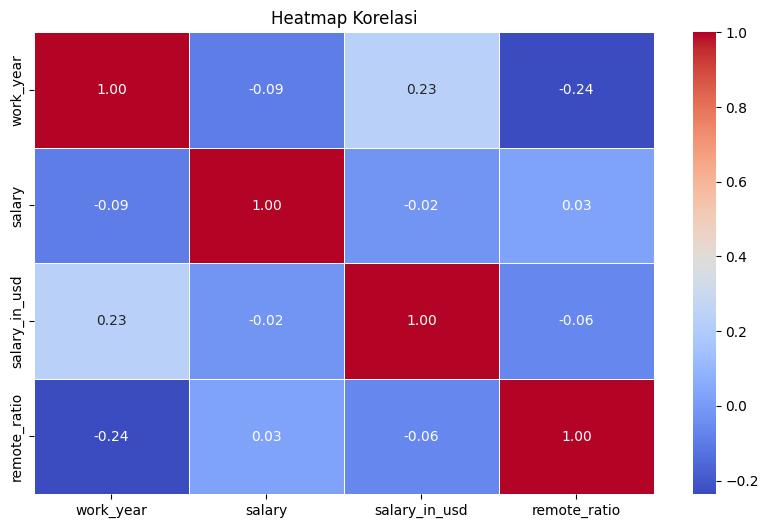

In [77]:
# Heatmap Korelasi variable numerik

numerical_cols = salary_df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_cols.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Heatmap Korelasi")
plt.show()

# **5. Data Preprocessing**

Hapus data/fitur yang tidak digunakan

In [78]:
salary_df.drop(columns=['salary', 'salary_currency'], inplace=True, errors='ignore')

Menangani Data Duplikat

In [79]:
salary_df.drop_duplicates(inplace=True)

In [80]:
salary_df.duplicated().sum()

np.int64(0)

In [81]:
salary_df.shape

(2584, 9)

Encoding data kategorikal

In [82]:
# Ordinal Encoding untuk kolom experience_level dan company_size
ordinal_mapping = {
    "experience_level": {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4},
    "company_size": {'S': 1, 'M': 2, 'L': 3}
}

for col, mapping in ordinal_mapping.items():
    salary_df[col] = salary_df[col].map(mapping)

In [83]:
# Frequency Encoding untuk job_title
salary_df['job_title_freq'] = salary_df['job_title'].map(salary_df['job_title'].value_counts())
salary_df.drop(columns=['job_title'], inplace=True)

In [84]:
# One-Hot Encoding untuk employment_type
employment_dummies = pd.get_dummies(salary_df['employment_type'], prefix='employment')
salary_df = pd.concat([salary_df, employment_dummies], axis=1)
salary_df.drop(columns=['employment_type'], inplace=True)

In [85]:
# Menghitung frekuensi kemunculan untuk company_location
location_count = salary_df['company_location'].value_counts()
salary_df['company_location_encoded'] = salary_df['company_location'].map(location_count)

In [86]:
# Menghitung frekuensi kemunculan untuk employee_residence
residence_count = salary_df['employee_residence'].value_counts()
salary_df['employee_residence_encoded'] = salary_df['employee_residence'].map(residence_count)

In [87]:
salary_df.drop(columns=['employee_residence', 'company_location'], inplace=True)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [88]:
salary_df

,work_year,experience_level,salary_in_usd,remote_ratio,company_size,job_title_freq,employment_CT,employment_FL,employment_FT,employment_PT,company_location_encoded,employee_residence_encoded
0,2023,3,85847,100,3,8,False,False,True,False,44,47
1,2023,2,30000,100,1,34,True,False,False,False,1929,1893
2,2023,2,25500,100,1,34,True,False,False,False,1929,1893
3,2023,3,175000,100,2,538,False,False,True,False,83,81
4,2023,3,120000,100,2,538,False,False,True,False,83,81
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,3,412000,100,3,538,False,False,True,False,1929,1893
3751,2021,2,151000,100,3,8,False,False,True,False,1929,1893
3752,2020,1,105000,100,1,538,False,False,True,False,1929,1893
3753,2020,1,100000,100,3,15,True,False,False,False,1929,1893


In [89]:
# Scaling Data
features= []
scaler = StandardScaler()
scaled_data = scaler.fit_transform(salary_df)

In [90]:
# KMeans Clustering
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Evaluasi dengan Silhouette Score
sil_score = silhouette_score(scaled_data, cluster_labels)

print(f"Silhouette Score untuk {n_clusters} cluster: {sil_score:.4f}")

Silhouette Score untuk 6 cluster: 0.2513


## **b. Evaluasi Model Clustering**

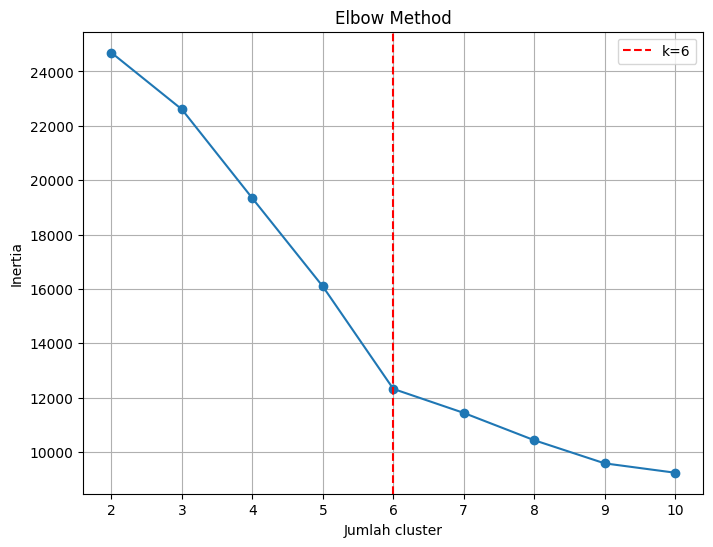

In [91]:
# Elbow method
inertia_values = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.axvline(x=6, linestyle='--', color='red', label='k=6')
plt.title('Elbow Method')
plt.xlabel('Jumlah cluster')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)
plt.show()

In [92]:
cluster_range = range(2, 11)
silhouette_scores = []

In [93]:
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_data)
    sil_score = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(sil_score)
    print(f"Silhouette Score untuk {k} cluster: {sil_score:.4f}")

Silhouette Score untuk 2 cluster: 0.3670
Silhouette Score untuk 3 cluster: 0.3607
Silhouette Score untuk 4 cluster: 0.2283
Silhouette Score untuk 5 cluster: 0.2464
Silhouette Score untuk 6 cluster: 0.2513
Silhouette Score untuk 7 cluster: 0.2536
Silhouette Score untuk 8 cluster: 0.2367
Silhouette Score untuk 9 cluster: 0.2582
Silhouette Score untuk 10 cluster: 0.2731


Insight :  
- Meskipun Silhouette Score lebih tinggi di k=2, k=6 masih memiliki nilai yang cukup baik (0.2513)  
-  Perubahan signifikan sebelum melandai terbentuk di k=6, menunjukkan jumlah cluster yang cukup baik dalam mengelompokkan data.  


## **c. Feature Selection (Opsional)**

In [94]:
# Reduce dimention PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)


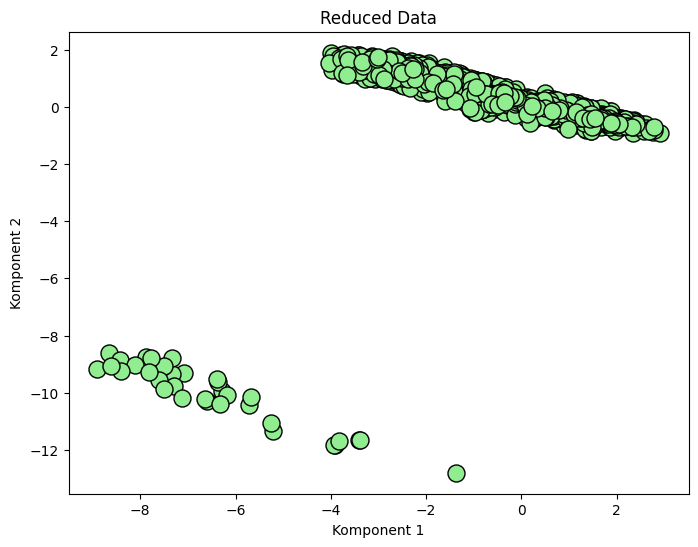

In [95]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='lightgreen', edgecolor='k', s=150)
plt.title("Reduced Data")
plt.xlabel("Komponent 1")
plt.ylabel("Komponent 2")
plt.show()

In [96]:
# Elbow method
wss = []
cluster_range = range(1, 11)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(pca_data)
    wss.append(kmeans.inertia_)

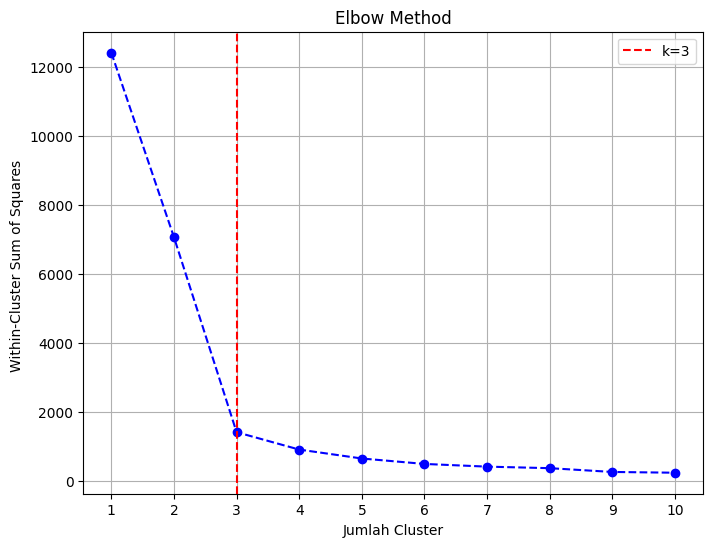

In [97]:
# Visualisasi Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, wss, marker='o', color='b', linestyle='--')
plt.axvline(x=3, linestyle='--', color='red', label='k=3')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Within-Cluster Sum of Squares ')
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)
plt.show()


In [98]:
# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(pca_data)

# Silhouette Score
sil_score = silhouette_score(pca_data, cluster_labels)
print(f"Hasil akhir silhuoette score setelah di reduksi : {sil_score:.4f}")

Hasil akhir silhuoette score setelah di reduksi : 0.7424


## **d. Visualisasi Hasil Clustering**

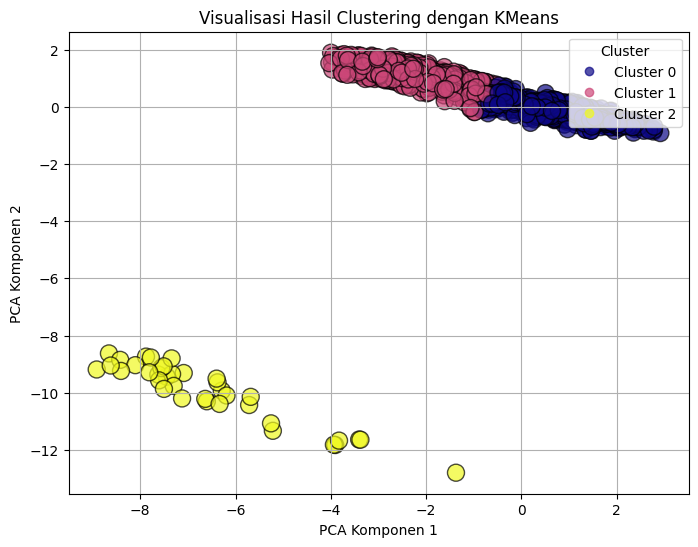

In [99]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='plasma', s=150, alpha=0.7, edgecolors='black')

handles, labels = scatter.legend_elements()
plt.legend(handles, [f'Cluster {i}' for i in range(n_clusters)], title="Cluster", loc='upper right')

plt.title('Visualisasi Hasil Clustering dengan KMeans')
plt.xlabel('PCA Komponen 1')
plt.ylabel('PCA Komponen 2')
plt.grid(True)

plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

1.  Tambahkan Hasil Label Cluster ke DataFrame

In [100]:
# Menambahkan label cluster ke dalam dataset
salary_df['Cluster_Group'] = cluster_labels

2. Menghitung rata-rata setiap fitur berdasarkan cluster

In [101]:
average_features_per_cluster = salary_df.groupby('Cluster_Group').mean()
print(average_features_per_cluster)

                 work_year  experience_level  salary_in_usd  remote_ratio  \
Cluster_Group                                                               
0              2022.460963          2.751872  156424.095187     46.604278   
1              2021.899557          2.119645   73695.571640     59.601182   
2              2021.567568          1.702703   62827.567568     79.729730   

               company_size  job_title_freq  employment_CT  employment_FL  \
Cluster_Group                                                               
0                  2.083422      355.501604        0.00000        0.00000   
1                  2.163959      299.035451        0.00000        0.00000   
2                  1.864865      187.378378        0.27027        0.27027   

               employment_FT  employment_PT  company_location_encoded  \
Cluster_Group                                                           
0                        1.0       0.000000               1912.241176   
1        

Invers Data

In [102]:
salary_df.head()

,work_year,experience_level,salary_in_usd,remote_ratio,company_size,job_title_freq,employment_CT,employment_FL,employment_FT,employment_PT,company_location_encoded,employee_residence_encoded,Cluster_Group
0,2023,3,85847,100,3,8,False,False,True,False,44,47,1
1,2023,2,30000,100,1,34,True,False,False,False,1929,1893,2
2,2023,2,25500,100,1,34,True,False,False,False,1929,1893,2
3,2023,3,175000,100,2,538,False,False,True,False,83,81,1
4,2023,3,120000,100,2,538,False,False,True,False,83,81,1


In [103]:
# Ordinal Encoding
experience_mapping = {1: "EN", 2: "MI", 3: "SE", 4: "EX"}
company_size_mapping = {1: "S", 2: "M", 3: "L"}

salary_df["experience_level"] = salary_df["experience_level"].map(experience_mapping)
salary_df["company_size"] = salary_df["company_size"].map(company_size_mapping)

# Tampilkan hasil
salary_df.head()

,work_year,experience_level,salary_in_usd,remote_ratio,company_size,job_title_freq,employment_CT,employment_FL,employment_FT,employment_PT,company_location_encoded,employee_residence_encoded,Cluster_Group
0,2023,SE,85847,100,L,8,False,False,True,False,44,47,1
1,2023,MI,30000,100,S,34,True,False,False,False,1929,1893,2
2,2023,MI,25500,100,S,34,True,False,False,False,1929,1893,2
3,2023,SE,175000,100,M,538,False,False,True,False,83,81,1
4,2023,SE,120000,100,M,538,False,False,True,False,83,81,1


In [104]:
print("\nJumlah Duplikasi:", salary_df.duplicated().sum())


Jumlah Duplikasi: 1


In [105]:
salary_df_ori.drop_duplicates(inplace=True)

In [106]:
print("\nJumlah Duplikasi:", salary_df.duplicated().sum())


Jumlah Duplikasi: 1


In [107]:
salary_df = salary_df.merge(salary_df_ori[["job_title"]], left_index=True, right_index=True, how="left")

In [108]:
# Frequency Encoding
inverse_job_mapping = salary_df.groupby("job_title")["job_title_freq"].first().to_dict()
reverse_mapping = {v: k for k, v in inverse_job_mapping.items()}

salary_df["job_title"] = salary_df["job_title_freq"].map(reverse_mapping)
salary_df.drop(["job_title_freq"], axis=1, inplace=True)

# Tampilkan hasil
salary_df.head()

,work_year,experience_level,salary_in_usd,remote_ratio,company_size,employment_CT,employment_FL,employment_FT,employment_PT,company_location_encoded,employee_residence_encoded,Cluster_Group,job_title
0,2023,SE,85847,100,L,False,False,True,False,44,47,1,Principal Data Scientist
1,2023,MI,30000,100,S,True,False,False,False,1929,1893,2,ML Engineer
2,2023,MI,25500,100,S,True,False,False,False,1929,1893,2,ML Engineer
3,2023,SE,175000,100,M,False,False,True,False,83,81,1,Data Scientist
4,2023,SE,120000,100,M,False,False,True,False,83,81,1,Data Scientist


In [109]:
# Buat mapping dari kolom one-hot ke nilai aslinya
employment_mapping = {
    "employment_CT": "CT",
    "employment_FL": "FL",
    "employment_FT": "FT",
    "employment_PT": "PT",
}

# Invers One-Hot Encoding
salary_df["employment_type"] = salary_df[["employment_CT", "employment_FL", "employment_FT", "employment_PT"]].idxmax(axis=1)

# Ubah nama kolom ke nilai aslinya
salary_df["employment_type"] = salary_df["employment_type"].map(employment_mapping)

salary_df.drop(["employment_CT", "employment_FL", "employment_FT", "employment_PT"], axis=1, inplace=True)

# Tampilkan hasil
salary_df.head()


,work_year,experience_level,salary_in_usd,remote_ratio,company_size,company_location_encoded,employee_residence_encoded,Cluster_Group,job_title,employment_type
0,2023,SE,85847,100,L,44,47,1,Principal Data Scientist,FT
1,2023,MI,30000,100,S,1929,1893,2,ML Engineer,CT
2,2023,MI,25500,100,S,1929,1893,2,ML Engineer,CT
3,2023,SE,175000,100,M,83,81,1,Data Scientist,FT
4,2023,SE,120000,100,M,83,81,1,Data Scientist,FT


In [110]:
salary_df = salary_df.merge(salary_df_ori[['company_location']], left_index=True, right_index=True, how="left")

# Hapus kolom encoded jika tidak diperlukan lagi
salary_df.drop(columns=['company_location_encoded'], inplace=True)

# Tampilkan hasil
salary_df.head()


,work_year,experience_level,salary_in_usd,remote_ratio,company_size,employee_residence_encoded,Cluster_Group,job_title,employment_type,company_location
0,2023,SE,85847,100,L,47,1,Principal Data Scientist,FT,ES
1,2023,MI,30000,100,S,1893,2,ML Engineer,CT,US
2,2023,MI,25500,100,S,1893,2,ML Engineer,CT,US
3,2023,SE,175000,100,M,81,1,Data Scientist,FT,CA
4,2023,SE,120000,100,M,81,1,Data Scientist,FT,CA


In [111]:
salary_df = salary_df.merge(salary_df_ori[['employee_residence']], left_index=True, right_index=True, how="left")

# Hapus kolom encoded jika tidak diperlukan lagi
salary_df.drop(columns=['employee_residence_encoded'], inplace=True)

# Tampilkan hasil
salary_df.head()

,work_year,experience_level,salary_in_usd,remote_ratio,company_size,Cluster_Group,job_title,employment_type,company_location,employee_residence
0,2023,SE,85847,100,L,1,Principal Data Scientist,FT,ES,ES
1,2023,MI,30000,100,S,2,ML Engineer,CT,US,US
2,2023,MI,25500,100,S,2,ML Engineer,CT,US,US
3,2023,SE,175000,100,M,1,Data Scientist,FT,CA,CA
4,2023,SE,120000,100,M,1,Data Scientist,FT,CA,CA


In [112]:
# Pindahkan 'Cluster_Group' ke paling kanan
salary_df = salary_df[[col for col in salary_df.columns if col != 'Cluster_Group'] + ['Cluster_Group']]

In [113]:
salary_df.head()

,work_year,experience_level,salary_in_usd,remote_ratio,company_size,job_title,employment_type,company_location,employee_residence,Cluster_Group
0,2023,SE,85847,100,L,Principal Data Scientist,FT,ES,ES,1
1,2023,MI,30000,100,S,ML Engineer,CT,US,US,2
2,2023,MI,25500,100,S,ML Engineer,CT,US,US,2
3,2023,SE,175000,100,M,Data Scientist,FT,CA,CA,1
4,2023,SE,120000,100,M,Data Scientist,FT,CA,CA,1


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- Tahun Kerja Rata-rata: 2022.46  
- Tingkat Pengalaman: 2.75 (lebih tinggi dibandingkan cluster lain)  
- Gaji Tahunan Rata-rata (USD): $156,424 (tertinggi di antara cluster)  
- Remote Work Ratio: 46.6%  
- Ukuran Perusahaan: 2.08 (cenderung perusahaan menengah-besar)  
- Frekuensi Job Title: 355.5 (pekerjaan dengan demand tinggi)  
- Lokasi Perusahaan : 1912.24  
- Residensi Karyawan : 1872.52  

**Analisis:** Cluster ini terdiri dari individu dengan tingkat pengalaman tinggi dan gaji tertinggi. Mereka umumnya bekerja di perusahaan menengah hingga besar dan memiliki tingkat remote work yang sedang. Posisi pekerjaan dalam cluster ini cukup banyak dicari di industri.

## Cluster 1:
- Tahun Kerja Rata-rata: 2021.89    
- Tingkat Pengalaman: 2.12    
- Gaji Tahunan Rata-rata (USD): $73,695  
- Remote Work Ratio: 59.6% (lebih tinggi dari Cluster 0)  
- Ukuran Perusahaan: 2.16 (lebih besar dari Cluster 0)  
- Frekuensi Job Title: 299.03  
- Lokasi Perusahaan (encoded): 224.19  
- Residensi Karyawan (encoded): 159.26  

**Analisis:** Cluster ini terdiri dari individu dengan pengalaman menengah dan gaji rata-rata yang lebih rendah dibandingkan Cluster 0. Mereka lebih banyak bekerja secara remote dan berada di perusahaan yang lebih besar. Cluster ini bisa mencerminkan pekerja di sektor dengan permintaan sedang dan gaji moderat..

## Cluster 2:
- Tahun Kerja Rata-rata: 2021.56  
- Tingkat Pengalaman: 1.70 (terendah dibanding cluster lain)  
- Gaji Tahunan Rata-rata (USD): $62,827 (terendah di antara cluster)  
- Remote Work Ratio: 79.7% (paling tinggi)  
- Ukuran Perusahaan: 1.86 (cenderung lebih kecil)  
- Frekuensi Job Title: 187.38 (lebih sedikit dibandingkan cluster lain)  
- Lokasi Perusahaan (encoded): 949.56  
- Residensi Karyawan (encoded): 425.40  

**Analisis:** Cluster ini berisi individu dengan pengalaman paling sedikit dan gaji terendah. Mereka cenderung bekerja secara remote dalam perusahaan kecil atau startup. Cluster ini kemungkinan mencerminkan pekerja entry-level yang memiliki fleksibilitas tinggi dalam lokasi kerja.

## Kesimpulan  
Cluster 0 → Profesional berpengalaman dengan gaji tinggi, bekerja di perusahaan besar.

Cluster 1 → Pekerja menengah dengan gaji moderat, cenderung bekerja secara remote.

Cluster 2 → Pekerja entry-level dengan gaji lebih rendah, bekerja di perusahaan kecil dengan remote work tinggi.

# Rekomendasi Bisnis Berdasarkan Pola Gaji  

Cluster 0 - Profesional Senior  
Membangun platform eksklusif untuk pengembangan kepemimpinan dan networking bagi profesional berpengalaman, dengan kursus premium, mentorship, dan event industri.

Cluster 1 - Pekerja Menengah Remote  
Menyediakan coworking space hybrid dan virtual office yang fleksibel bagi pekerja remote untuk meningkatkan produktivitas dan membangun koneksi profesional.

Cluster 2 - Pekerja Entry-Level  
Mengembangkan platform freelance dan pelatihan kerja berbasis AI untuk membantu pekerja pemula mendapatkan pengalaman dan proyek sesuai keterampilan mereka.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [122]:
salary_df.to_csv('Dataset_inisiasi.csv', index=False)